# 1. Camera Calibration

This script intends to calibrate a camera using an object.
For this implementation we will use the DLT transform for the estimation of the camera parameters

**Import the libraries**

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
%matplotlib widget

ImportError: DLL load failed while importing cv2: Impossível localizar o módulo especificado.

## Direct Linear Transform

**Implementation:**


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
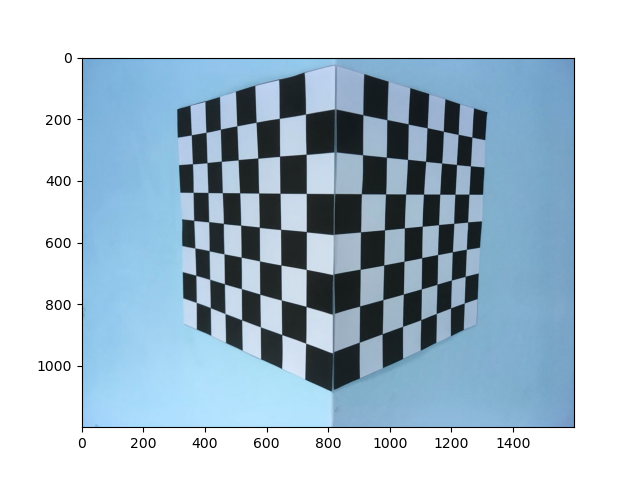

In [17]:
#Import the image
img = cv2.imread("calobject.jpg")
# convert it to gray scale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
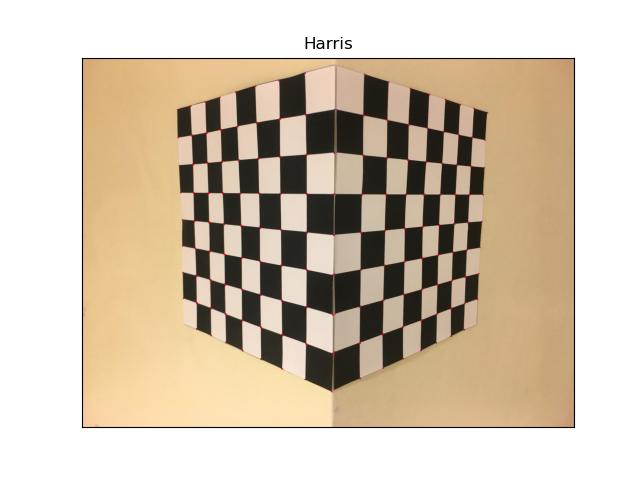

Docstring:
connectedComponentsWithStats(image[, labels[, stats[, centroids[, connectivity[, ltype]]]]]) -> retval, labels, stats, centroids
.   @overload
.   @param image the 8-bit single-channel image to be labeled
.   @param labels destination labeled image
.   @param stats statistics output for each label, including the background label.
.   Statistics are accessed via stats(label, COLUMN) where COLUMN is one of
.   #ConnectedComponentsTypes, selecting the statistic. The data type is CV_32S.
.   @param centroids centroid output for each label, including the background label. Centroids are
.   accessed via centroids(label, 0) for x and centroids(label, 1) for y. The data type CV_64F.
.   @param connectivity 8 or 4 for 8-way or 4-way connectivity respectively
.   @param ltype output image label type. Currently CV_32S and CV_16U are supported.
Type:      builtin_function_or_method


(1200, 1600, 3)


In [29]:
dst = cv2.cornerHarris(gray,2,3,0.07)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image
threshold = 0.02
ret, dst = cv2.threshold(img,threshold*dst.max(),255,0)
dst = np.uint8(dst)
cv2.connectedComponentsWithStats?
#find centroids
#ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)


plt.figure("Harris detector")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("Harris")
plt.xticks([]), plt.yticks([])
plt.show()
print(dst.shape)